# IST 718 Lab 1
## Author Mohamad Nayal

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy.stats import uniform
import statsmodels.formula.api as smf 

### Importing Coaches Dataset

In [2]:
coaches=pd.read_csv('Coaches9.csv')
coaches.head()


,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"


In [3]:
print(coaches.shape)
coaches.describe()

(129, 9)


,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
count,129,129,129,129,129,129,129,129,129
unique,129,11,129,104,105,85,51,1,102
top,Notre Dame,SEC,Tony Sanchez,"$3,500,000","$3,500,000",--,--,$0,--
freq,1,14,1,5,5,22,41,129,22


### Importing Gameplay Dataset

In [5]:
#Pulling in more data about NCAA 2007 schools
schools=pd.read_html('https://www.sports-reference.com/cfb/years/2019-ratings.html')
#removing unwanted tables
schools=schools[0]
#removing multindex column names so all columns have one name
schools.columns = schools.columns.droplevel()
schools.columns=['Rank', 'School', 'Conference', 'Poll Rank', 'Wins', 'Losses', 'OffenSRS', 'DefSRS', 'SRS', 'PointsPerGame', 'OppPointsPerGame', 'Passing','OppPassing', 'Rushing', 'OppRushing', 'TotalYards', 'OppYards']
#removing rows with no information and just column names
schools=schools[schools.Wins!='Overall']
schools=schools[schools.Wins!='W']
#schools=schools.drop([20,21,42,43,64,65,86,87,108,109])
#sorting based on name of school order
schools.sort_values('School',inplace=True, ascending=True)
schools

,Rank,School,Conference,Poll Rank,Wins,Losses,OffenSRS,DefSRS,SRS,PointsPerGame,OppPointsPerGame,Passing,OppPassing,Rushing,OppRushing,TotalYards,OppYards
26,25,Air Force,MWC (Mountain),22,11,2,3.58,6.89,10.47,45.22,6.20,14.42,5.39,6.24,2.18,7.30,4.05
140,129,Akron,MAC (East),NaN,0,12,-20.57,-6.07,-26.64,17.31,26.06,6.44,6.91,2.46,3.71,4.67,4.91
2,3,Alabama,SEC (West),8,11,2,13.02,8.09,21.11,64.63,1.90,12.99,4.33,6.79,2.22,9.70,3.26
24,23,Appalachian State,Sun Belt (East),19,13,1,6.97,4.52,11.49,49.62,8.22,8.59,5.27,6.44,2.29,7.29,3.80
100,93,Arizona,Pac-12 (South),NaN,4,8,2.33,-6.57,-4.25,42.98,19.25,9.54,5.76,5.95,3.62,7.43,4.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,84,West Virginia,Big 12,NaN,5,7,-3.55,0.62,-2.92,37.77,11.26,8.49,5.86,4.19,2.21,6.50,3.83
69,64,Western Kentucky,CUSA (East),NaN,9,4,-2.90,3.20,0.31,36.44,9.50,8.47,5.57,4.70,2.61,6.58,4.11
82,77,Western Michigan,MAC (West),NaN,7,6,0.16,-1.93,-1.77,42.14,15.63,8.44,6.11,6.09,3.81,7.09,4.94
4,5,Wisconsin,Big Ten (West),11,10,4,5.48,12.25,17.73,55.33,-3.22,10.41,4.05,7.27,1.81,8.35,3.14


#### Scrubing Gameplay Dataset

In [6]:
schools.School[136]='Bowling Green'
schools.School[66]='Brigham Young'
schools.School[57]='Miami (Fla.)'
schools.School[93]='Miami (Ohio)'
schools.School[110]='Middle Tennessee'
schools.School[23]='Central Florida'
schools.School[139]='Texas-El Paso'
schools.School[28]='Southern Methodist'
schools.School[30]='Southern California'
schools.School[67]='Pittsburgh'
schools.School[102]='Alabama at Birmingham'
schools.School[55]='Mississippi'
schools.School[134]='Texas-San Antonio'
schools.School[31]='Louisiana-Lafayette'

In [7]:
schools.School= schools.School.str.lstrip()
schools.School= schools.School.str.rstrip()
coaches.School= coaches.School.str.lstrip()
coaches.School= coaches.School.str.rstrip()
coachSchool = pd.merge(coaches, schools, how="left", on=["School", "School"])

In [8]:
colList=['TotalPay', 'School', 'Conference_x', 'Coach', 'SchoolPay', 'Bonus', 'BonusPaid',
        'AssistantPay', 'Buyout', 'Rank', 'Conference_y', 'Poll Rank', 'Wins',
        'Losses', 'OffenSRS', 'DefSRS', 'SRS', 'PointsPerGame',
        'OppPointsPerGame', 'Passing', 'OppPassing', 'Rushing', 'OppRushing',
        'TotalYards', 'OppYards']

In [9]:
coachSchool.TotalPay=coachSchool.TotalPay.str.replace('\D', '')
coachSchool.SchoolPay=coachSchool.SchoolPay.str.replace('\D', '')
coachSchool.Bonus=coachSchool.Bonus.str.replace('\D', '')
coachSchool.Buyout=coachSchool.Buyout.str.replace('\D', '')
coachSchool.BonusPaid=coachSchool.BonusPaid.str.replace('\D', '')
coachSchool.TotalPay=pd.to_numeric(coachSchool.TotalPay)
coachSchool.SchoolPay=pd.to_numeric(coachSchool.SchoolPay)
coachSchool.Bonus=pd.to_numeric(coachSchool.Bonus)
coachSchool.Buyout=pd.to_numeric(coachSchool.Buyout)
coachSchool.BonusPaid=pd.to_numeric(coachSchool.BonusPaid)
coachSchool.Rank=pd.to_numeric(coachSchool.Rank)
coachSchool.iloc[:, 12]=pd.to_numeric(coachSchool.iloc[:, 12])
coachSchool.iloc[:, 13]=pd.to_numeric(coachSchool.iloc[:, 13])
coachSchool.iloc[:, 14]=pd.to_numeric(coachSchool.iloc[:, 14])
coachSchool.iloc[:, 15]=pd.to_numeric(coachSchool.iloc[:, 15])
coachSchool.iloc[:, 16]=pd.to_numeric(coachSchool.iloc[:, 16])
coachSchool.iloc[:, 17]=pd.to_numeric(coachSchool.iloc[:, 17])
coachSchool.iloc[:, 18]=pd.to_numeric(coachSchool.iloc[:, 18])
coachSchool.iloc[:, 19]=pd.to_numeric(coachSchool.iloc[:, 19])
coachSchool.iloc[:, 20]=pd.to_numeric(coachSchool.iloc[:, 20])
coachSchool.iloc[:, 21]=pd.to_numeric(coachSchool.iloc[:, 21])
coachSchool.iloc[:, 22]=pd.to_numeric(coachSchool.iloc[:, 22])
coachSchool.iloc[:, 23]=pd.to_numeric(coachSchool.iloc[:, 23])
coachSchool.iloc[:, 24]=pd.to_numeric(coachSchool.iloc[:, 24])

coachSchool = pd.get_dummies(coachSchool,columns=['Conference_x'],drop_first=True)
coachSchool.head()

<ipython-input-9-d140009fb150>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  coachSchool.TotalPay=coachSchool.TotalPay.str.replace('\D', '')
<ipython-input-9-d140009fb150>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  coachSchool.SchoolPay=coachSchool.SchoolPay.str.replace('\D', '')
<ipython-input-9-d140009fb150>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  coachSchool.Bonus=coachSchool.Bonus.str.replace('\D', '')
<ipython-input-9-d140009fb150>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  coachSchool.Buyout=coachSchool.Buyout.str.replace('\D', '')
<ipython-input-9-d140009fb150>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  coachSchool.BonusPaid=coachSchool.BonusPaid.str.replace('\D', '')


,School,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Rank,Conference_y,...,Conference_x_ACC,Conference_x_Big 12,Conference_x_Big Ten,Conference_x_C-USA,Conference_x_Ind.,Conference_x_MAC,Conference_x_Mt. West,Conference_x_Pac-12,Conference_x_SEC,Conference_x_Sun Belt
0,Air Force,Troy Calhoun,885000.0,885000.0,247000.0,NaN,$0,NaN,25,MWC (Mountain),...,0,0,0,0,0,0,1,0,0,0
1,Akron,Terry Bowden,411000.0,412500.0,225000.0,50000.0,$0,688500.0,129,MAC (East),...,0,0,0,0,0,1,0,0,0,0
2,Alabama,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,$0,33600000.0,3,SEC (West),...,0,0,0,0,0,0,0,0,1,0
3,Alabama at Birmingham,Bill Clark,900000.0,900000.0,950000.0,165471.0,$0,3847500.0,95,CUSA (West),...,0,0,0,1,0,0,0,0,0,0
4,Appalachian State,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,$0,2160417.0,23,Sun Belt (East),...,0,0,0,0,0,0,0,0,0,1


In [10]:

correlationDF=coachSchool.corr()
payCorrelation=correlationDF.TotalPay.to_frame()
payCorrelation=payCorrelation.sort_values('TotalPay')
payCorrelation

,TotalPay
OppPointsPerGame,-0.666550
Rank,-0.643446
OppYards,-0.638301
OppRushing,-0.575327
OppPassing,-0.569721
Losses,-0.352732
Conference_x_MAC,-0.318745
Conference_x_C-USA,-0.286054
Conference_x_Sun Belt,-0.277333
Conference_x_Mt. West,-0.244836


[Text(0.5, 1.0, 'TotalPay Correlation Heatmap')]

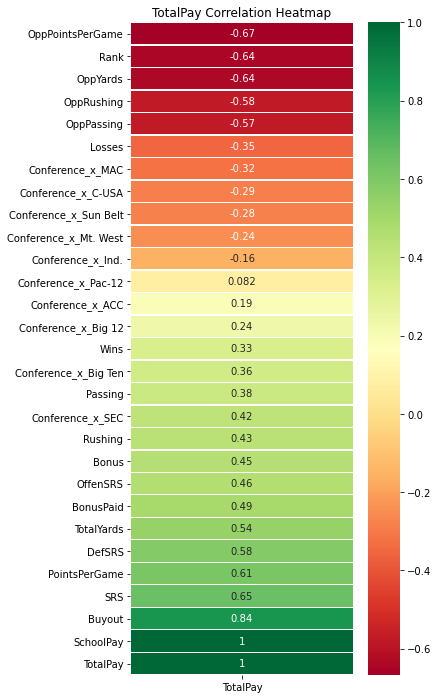

In [11]:
fig, ax = plt.subplots(figsize = (5, 12))
sns.heatmap(payCorrelation, cmap ='RdYlGn', linewidths = 0.30, annot = True).set(title='TotalPay Correlation Heatmap')

### Importing US Department of State Dataset

In [12]:
#importing academic data from Kaggle
#https://www.kaggle.com/datasets/kaggle/college-scorecard?select=MERGED2013_PP.csv
academic=pd.read_csv('/Users/mohamadnayal/Documents/Syracuse/Spring_2022/IST718/assignments/week3/university_acadmeic.csv')
academic.rename(columns={'INSTNM':'School'}, inplace=True)
#selecting columns of interest

#Renaming school names
academic.School.loc[academic['School']=='The University of Alabama']='Alabama'
academic.School.loc[academic['School']=='University of Akron Main Campus']='Akron'
academic.School.loc[academic['School']=='University of Alabama at Birmingham']='Alabama at Birmingham'
academic.School.loc[academic['School']=='Appalachian State University']='Appalachian State'
academic.School.loc[academic['School']=='University of Arizona']='Arizona'
academic.School.loc[academic['School']=='Arizona State University-Downtown Phoenix']='Arizona State'
academic.School.loc[academic['School']=='University of Arkansas']='Arkansas'
academic.School.loc[academic['School']=='Arkansas State-Main Campus']='Arkansas State'
academic.School.loc[academic['School']=='Bowling Green State University-Main Campus']='Bowling Green'
academic.School.loc[academic['School']=='Arkansas State University-Main Campus']='Arkansas State'
academic.School.loc[academic['School']=='Brigham Young University-Provo']='Brigham Young'
academic.School.loc[academic['School']=='University at Buffalo']='Buffalo'
academic.School.loc[academic['School']=='University of California-Berkeley']='California'
academic.School.loc[academic['School']=='University of Central Florida']='Central Florida'
academic.School.loc[academic['School']=='University of North Carolina at Charlotte']='Charlotte'
academic.School.loc[academic['School']=='University of Cincinnati-Main Campus']='Cincinnati'
academic.School.loc[academic['School']=='University of Colorado Denver']='Colorado'
academic.School.loc[academic['School']=='Colorado State University-Fort Collins']='Colorado State'
academic.School.loc[academic['School']=='California State University-Fresno']='Fresno State'
academic.School.loc[academic['School']=='Georgia Institute of Technology-Main Campus']='Georgia Tech'
academic.School.loc[academic['School']=='University of Hawaii-West Oahu']='Hawaii'
academic.School.loc[academic['School']=='University of Illinois at Chicago']='Illinois'
academic.School.loc[academic['School']=='Indiana State University']='Indiana'
academic.School.loc[academic['School']=='Kent State University at Kent']='Kent State'
academic.School.loc[academic['School']=='University of Louisiana at Lafayette']='Louisiana-Lafayette'
academic.School.loc[academic['School']=='University of Louisiana at Monroe']='Louisiana-Monroe'
academic.School.loc[academic['School']=='Louisiana State University and Agricultural & Mechanical College']='LSU'
academic.School.loc[academic['School']=='University of Maryland-University College']='Maryland'
academic.School.loc[academic['School']=='University of Massachusetts-Boston']='Massachusetts'
academic.School.loc[academic['School']=='University of Miami']='Miami (Fla.)'
academic.School.loc[academic['School']=='Miami University-Oxford']='Miami (Ohio)'
academic.School.loc[academic['School']=='University of Michigan-Ann Arbor']='Michigan'
academic.School.loc[academic['School']=='Middle Tennessee State University']='Middle Tennessee'
academic.School.loc[academic['School']=='University of Minnesota-Twin Cities']='Minnesota'
academic.School.loc[academic['School']=='University of Missouri-Columbia']='Missouri'
academic.School.loc[academic['School']=='University of Nebraska-Lincoln']='Nebraska'
academic.School.loc[academic['School']=='University of Nevada-Reno']='Nevada'
academic.School.loc[academic['School']=='University of New Mexico-Main Campus']='New Mexico'
academic.School.loc[academic['School']=='New Mexico State University-Main Campus']='New Mexico State'
academic.School.loc[academic['School']=='University of North Carolina at Chapel Hill']='North Carolina'
academic.School.loc[academic['School']=='North Carolina State University at Raleigh']='North Carolina State'
academic.School.loc[academic['School']=='Ohio University-Main Campus']='Ohio'
academic.School.loc[academic['School']=='Ohio State University-Main Campus']='Ohio State'
academic.School.loc[academic['School']=='University of Oklahoma-Norman Campus']='Oklahoma'
academic.School.loc[academic['School']=='Oklahoma State University-Main Campus']='Oklahoma State'
academic.School.loc[academic['School']=='Pennsylvania State University-Main Campus']='Penn State'
academic.School.loc[academic['School']=='University of Pittsburgh-Pittsburgh Campus']='Pittsburgh'
academic.School.loc[academic['School']=='Purdue University-Main Campus']='Purdue'
academic.School.loc[academic['School']=='Rutgers University-New Brunswick']='Rutgers'
academic.School.loc[academic['School']=='University of South Carolina-Columbia']='South Carolina'
academic.School.loc[academic['School']=='University of South Florida-Main Campus']='South Florida'
academic.School.loc[academic['School']=='The University of Tennessee-Knoxville']='Tennessee'
academic.School.loc[academic['School']=='The University of Texas at Austin']='Texas'
academic.School.loc[academic['School']=='Texas A & M University-College Station']='Texas A&M'
academic.School.loc[academic['School']=='The University of Texas at El Paso']='Texas-El Paso'
academic.School.loc[academic['School']=='The University of Texas at San Antonio']='Texas-San Antonio'
academic.School.loc[academic['School']=='Tulane University of Louisiana']='Tulane'
academic.School.loc[academic['School']=='University of California-Los Angeles']='UCLA'
academic.School.loc[academic['School']=='University of Virginia-Main Campus']='Virginia'
academic.School.loc[academic['School']=='Virginia Polytechnic Institute and State University']='Virginia Tech'
academic.School.loc[academic['School']=='University of Washington-Seattle Campus']='Washington'
academic.School.loc[academic['School']=='University of Wisconsin-Madison']='Wisconsin'
academic.School.loc[academic['School']=='Ball State University']='Ball State'
academic.School=coachSchool.School.str.replace(' Univeristy', '')
academic.School=coachSchool.School.str.replace('Univeristy of ', '')

/Users/mohamadnayal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
#merging academic data
acad2=academic
acad2=acad2[['School','STABBR', 'HIGHDEG','LATITUDE', 'LONGITUDE','HBCU','PBI',
                 'RELAFFIL','ADM_RATE','SATVRMID','SATMTMID','SATWRMID','UG','UGDS_WHITE','UGDS_BLACK',
                 'COSTT4_A','TUITFTE','AVGFACSAL', 'C150_4']].copy()
acad2.columns=['School', "State", 'highestDegree','Latitude', 'Longitude', 'HistBlack', 'PredomBlack', 'Religous',
                  "AdmisRate", 'midSATread','midSATmath', 'midSATwriting','undergrads','percentWhite', 'percentBlack','costOfAttend',
                  'turitionRevenueperStud','facultySalary','GradRate']
coachSchool.School=coachSchool.School.replace(' ','',regex=True)
acad2.School=acad2.School.replace(' ','',regex=True)
#merging with coach data
coachSchoolAcad = pd.merge(coachSchool, acad2, how="left", on=["School", "School"])

In [15]:
#dropping Air Force Navy and Army dut to missing enrolment data
#coachSchoolAcad=coachSchoolAcad.drop([0,9,69])
coachSchoolAcad=coachSchoolAcad.drop(['SchoolPay', 'AssistantPay', 'Conference_y', 'Bonus','BonusPaid'], axis=1)
coachSchoolAcad.head()

,School,Coach,TotalPay,Buyout,Rank,Poll Rank,Wins,Losses,OffenSRS,DefSRS,...,midSATread,midSATmath,midSATwriting,undergrads,percentWhite,percentBlack,costOfAttend,turitionRevenueperStud,facultySalary,GradRate
0,AirForce,Troy Calhoun,885000.0,NaN,25,22,11,2,3.58,6.89,...,NaN,NaN,NaN,NaN,0.0000,1.0000,NaN,13515.0,NaN,NaN
1,Akron,Terry Bowden,412500.0,688500.0,129,NaN,0,12,-20.57,-6.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23181.0,7769.0,NaN
2,Alabama,Nick Saban,8307000.0,33600000.0,3,8,11,2,13.02,8.09,...,NaN,NaN,NaN,NaN,0.0970,0.0000,12189.0,1917.0,4093.0,NaN
3,AlabamaatBirmingham,Bill Clark,900000.0,3847500.0,95,NaN,9,5,-5.89,1.29,...,NaN,NaN,NaN,NaN,0.1026,0.7949,NaN,9125.0,NaN,NaN
4,AppalachianState,Scott Satterfield,712500.0,2160417.0,23,19,13,1,6.97,4.52,...,NaN,NaN,NaN,NaN,0.0286,0.0571,NaN,14846.0,NaN,NaN


In [16]:
#Printing all column names as df
coachSchoolAcad.columns.to_frame().reset_index(drop=True)

,0
0,School
1,Coach
2,TotalPay
3,Buyout
4,Rank
5,Poll Rank
6,Wins
7,Losses
8,OffenSRS
9,DefSRS


## Exploring the Dataset

In [17]:
#printing summary statistics of total pay
pd.options.display.float_format = '{:.2f}'.format
coachSchoolAcad.TotalPay.describe().to_frame()

,TotalPay
count,125.00
mean,2417060.76
std,1885752.30
min,390000.00
25%,805850.00
50%,1900008.00
75%,3617500.00
max,8307000.00


/Users/mohamadnayal/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mohamadnayal/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


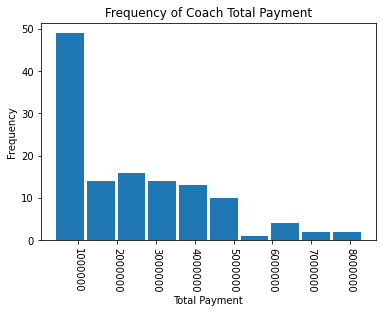

In [18]:
#plotting histogram of all total pay
plt.hist(coachSchoolAcad['TotalPay'], stacked = False, rwidth = .9)
plt.title("Frequency of Coach Total Payment")
plt.xlabel('Total Payment')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.xticks(rotation = -90)
plt.show()

In [19]:
#Making one dataframe per conference
acc=coachSchoolAcad[coachSchoolAcad.Conference_x_ACC==1]
big12=df_z[df_z['Conference_x_Big 12']==1]
bigTen=df_z[df_z['Conference_x_Big Ten']==1]
cUSA=df_z[df_z['Conference_x_C-USA']==1]
indep=coachSchoolAcad[coachSchoolAcad['Conference_x_Ind.']==1]
mac=coachSchoolAcad[coachSchoolAcad['Conference_x_MAC']==1]
mtWest=coachSchoolAcad[coachSchoolAcad['Conference_x_Mt. West']==1]
pac12=coachSchoolAcad[coachSchoolAcad['Conference_x_Pac-12']==1]
sec=coachSchoolAcad[coachSchoolAcad['Conference_x_SEC']==1]
sBelt=coachSchoolAcad[coachSchoolAcad['Conference_x_Sun Belt']==1]
#getting america conference by exclusion of others
american=coachSchoolAcad.query("Conference_x_ACC==0 and `Conference_x_Big 12`==0 and `Conference_x_Big Ten`==0 and `Conference_x_C-USA`==0 and `Conference_x_Ind.`==0 and Conference_x_MAC==0 and `Conference_x_Mt. West`==0 and `Conference_x_Pac-12`==0 and Conference_x_SEC==0 and `Conference_x_Sun Belt`==0")


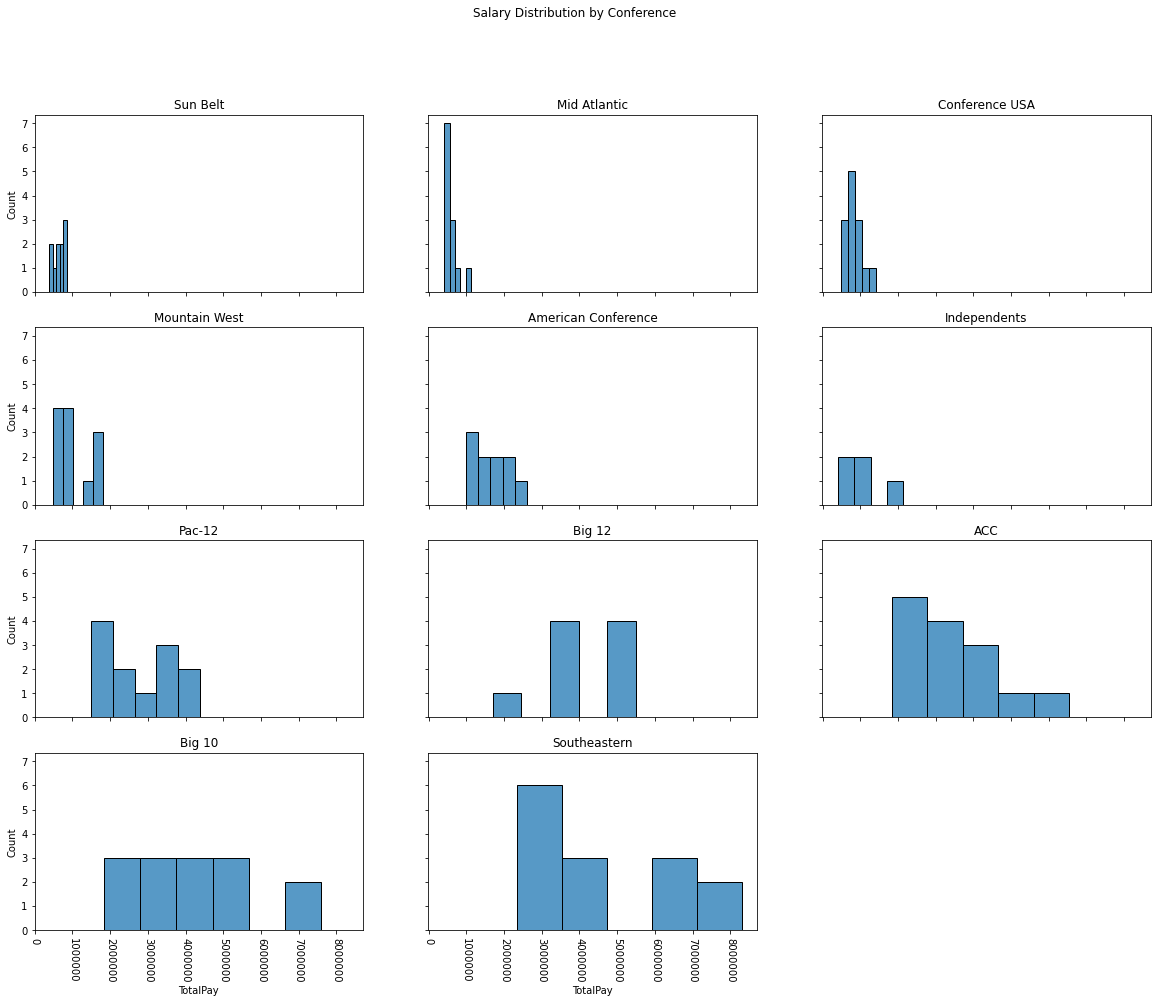

In [20]:
#fig, axes = plt.subplots(5, 2)

fig, axes = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(20,15))
fig.suptitle('Salary Distribution by Conference')
#axes[0].set_title('Title of the first chart')
#fig.delaxes(ax[3,2]) 

axes[0,0].set_title('Sun Belt')
sns.histplot(ax=axes[0,0], data=sBelt, x="TotalPay")
axes[0,1].set_title('Mid Atlantic')
sns.histplot(ax=axes[0,1], data=mac, x="TotalPay")
axes[0,2].set_title('Conference USA')
sns.histplot(ax=axes[0,2], data=cUSA, x="TotalPay")
axes[1,0].set_title('Mountain West')
sns.histplot(ax=axes[1,0], data=mtWest, x="TotalPay")
axes[1,1].set_title('American Conference')
sns.histplot(ax=axes[1,1], data=american, x="TotalPay")
axes[1,2].set_title('Independents')
sns.histplot(ax=axes[1,2], data=indep, x="TotalPay")
axes[2,0].set_title('Pac-12')
sns.histplot(ax=axes[2,0], data=pac12, x="TotalPay")
axes[2,1].set_title('Big 12')
sns.histplot(ax=axes[2,1], data=big12, x="TotalPay")
axes[2,2].set_title('ACC')
sns.histplot(ax=axes[2,2], data=acc, x="TotalPay")
axes[3,0].set_title('Big 10')
sns.histplot(ax=axes[3,0], data=bigTen, x="TotalPay")
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.xticks(rotation = -90)
axes[3,1].set_title('Southeastern')
sns.histplot(ax=axes[3,1], data=sec, x="TotalPay")
fig.delaxes(axes[3,2])
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.xticks(rotation = -90)
plt.sca(axes[3,0])
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.xticks(rotation = -90)
plt.show()

[Text(0.5, 1.0, 'TotalPay Correlation Heatmap')]

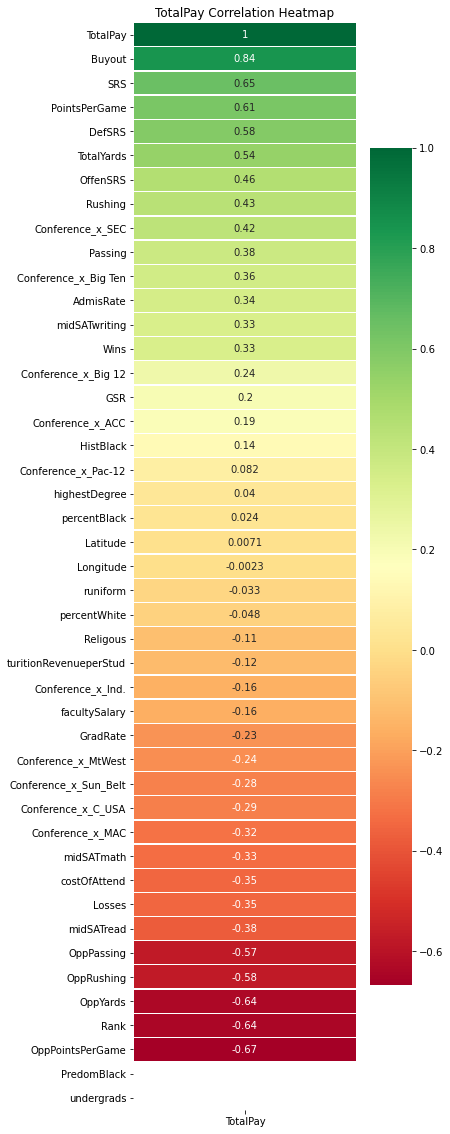

In [55]:
LONGcorrelationDF=coachSchoolAcad.corr()
LONGpayCorrelation=LONGcorrelationDF.TotalPay.to_frame()
LONGpayCorrelation=LONGpayCorrelation.sort_values('TotalPay', ascending=False)
LONGpayCorrelation
fig, ax = plt.subplots(figsize = (5, 20))
sns.heatmap(LONGpayCorrelation, cmap ='RdYlGn', linewidths = 0.30, annot = True).set(title='TotalPay Correlation Heatmap')

<AxesSubplot:title={'center':'Rank vs Pay'}, xlabel='Rank', ylabel='TotalPay'>

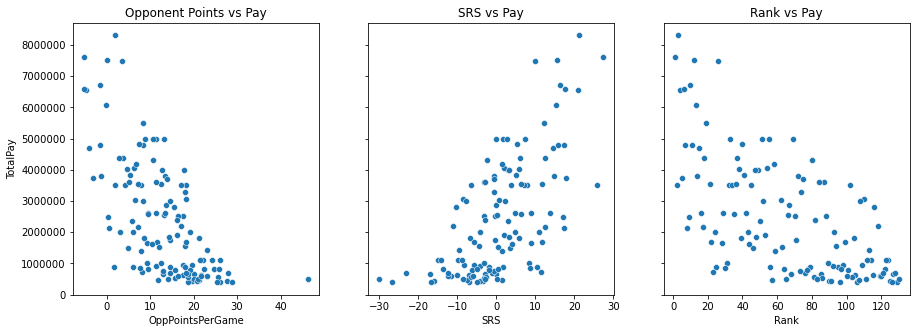

In [22]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(15,5))
axes[0].set_title('Opponent Points vs Pay')
sns.scatterplot(ax=axes[0],data=coachSchoolAcad, x="OppPointsPerGame", y="TotalPay")
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
sns.scatterplot(ax=axes[1],data=coachSchoolAcad, x="SRS", y="TotalPay")
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
axes[1].set_title('SRS vs Pay')
axes[2].set_title('Rank vs Pay')
sns.scatterplot(ax=axes[2],data=coachSchoolAcad, x="Rank", y="TotalPay")

#### Adding graduation data from NCAA Site

In [43]:
#pulling in gradutation rates from NCAA site
#url = requests.get('https://web3.ncaa.org/aprsearch/gsrsearch')
gradRate=pd.read_csv('/Users/mohamadnayal/Documents/Syracuse/Spring_2022/IST718/assignments/week3/ncaa_Grad_Rate_data.csv')
gradRate.School=gradRate.School.replace('University of ', '',regex=True)
gradRate.School=gradRate.School.replace(' University', '',regex=True)
gradRate.School=gradRate.School.replace(' ', '',regex=True)
gradRate=gradRate[['School', 'GSR']].copy()
gradRate.School.loc[gradRate['School']=='Arkansas,Fayetteville']='Arkansas'
gradRate.School.loc[gradRate['School']=='BowlingGreenState']='BowlingGreenState'
gradRate.School.loc[gradRate['School']=='UniversityatBuffalo,theStateNewYork']='Buffalo'
gradRate.School.loc[gradRate['School']=='California,Berkeley']='California'
gradRate.School.loc[gradRate['School']=='TheNorthCarolinaatCharlotte']='Charlotte'
gradRate.School.loc[gradRate['School']=='Colorado,Boulder']='Colorado'
gradRate.School.loc[gradRate['School']=='CaliforniaState,Fresno']='FresnoState'
gradRate.School.loc[gradRate['School']=='GeorgiaInstituteofTechnology']='GeorgiaTech'
gradRate.School.loc[gradRate['School']=='Hawaii,Manoa']='Hawaii'
gradRate.School.loc[gradRate['School']=='IllinoisState']='Illinois'
gradRate.School.loc[gradRate['School']=='IndianaState']='Indiana'
gradRate.School.loc[gradRate['School']=='LouisianaatLafayette']='Louisiana-Lafayette'
gradRate.School.loc[gradRate['School']=='LouisianaMonroe']='Louisiana-Monroe'
gradRate.School.loc[gradRate['School']=='LouisianaState']='LSU'
gradRate.School.loc[gradRate['School']=='Maryland,CollegePark']='Maryland'
gradRate.School.loc[gradRate['School']=='Massachusetts,Amherst']='Massachusetts'
gradRate.School.loc[gradRate['School']=='Miami(Florida)']='Miami(Fla.)'
gradRate.School.loc[gradRate['School']=='MiddleTennesseeState']='MiddleTennessee'
gradRate.School.loc[gradRate['School']=='Minnesota,TwinCities']='Minnesota'
gradRate.School.loc[gradRate['School']=='Missouri,Columbia']='Missouri'
gradRate.School.loc[gradRate['School']=='U.S.AirForceAcademy']='AirForce'
gradRate.School.loc[gradRate['School']=='U.S.AirForceAcademy']='Navy'
gradRate.School.loc[gradRate['School']=='Nebraska,Lincoln']='Nebraska'
gradRate.School.loc[gradRate['School']=='Nevada,Reno']='Nevada'
gradRate.School.loc[gradRate['School']=='Nevada']='Nevada-LasVegas'
gradRate.School.loc[gradRate['School']=='NorthCarolina']='NorthCarolina'
gradRate.School.loc[gradRate['School']=='OhioState']='OhioState'
gradRate.School.loc[gradRate['School']=='PennsylvaniaState']='PennState'
gradRate.School.loc[gradRate['School']=='Rutgers,TheStateNewJersey,NewBrunswick']='Rutgers'
gradRate.School.loc[gradRate['School']=='SouthCarolina,Columbia']='SouthCarolina'
gradRate.School.loc[gradRate['School']=='SouthernMississippi']='SouthernMississippi'
gradRate.School.loc[gradRate['School']=='Tennessee,Knoxville']='Tennessee'
gradRate.School.loc[gradRate['School']=='TexasatAustin']='Texas'
gradRate.School.loc[gradRate['School']=='Texas-ElPaso']='TexasA&M'
gradRate.School.loc[gradRate['School']=='Texas-ElPaso']='Texas-ElPaso'
gradRate.School.loc[gradRate['School']=='TexasatSanAntonio']='Texas-SanAntonio'
gradRate.School.loc[gradRate['School']=='TheTulsa']='Tulsa'
gradRate.School.loc[gradRate['School']=='California,LosAngeles']='UCLA'
gradRate.School.loc[gradRate['School']=='VirginiaPolytechnicInstituteandState']='VirginiaTech'
gradRate.School.loc[gradRate['School']=='Wisconsin-Madison']='Wisconsin'
gradRate2=gradRate
coachSchoolAcadGrad = pd.merge(coachSchoolAcad, gradRate, how="left", on=["School", "School"])
coachSchoolAcad=coachSchoolAcadGrad


/Users/mohamadnayal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [76]:
coachSchoolAcad.rename(columns={'Conference_x_Sun Belt':'Conference_x_Sun_Belt', 'Conference_x_Mt. West': 'Conference_x_MtWest', 'Conference_x_C-USA':'Conference_x_C_USA', 'Conference_x_Big 12':'Conference_x_Big_12', 'Conference_x_Big Ten':'Conference_x_Big_Ten', 'Conference_x_Ind.':'Conference_x_Ind', 'Conference_x_Pac-12':'Conference_x_Pac12'}, inplace=True)

### Modeling

#### Model 1 - Conference only

In [162]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
coachSchoolAcad['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coachSchoolAcad))
coachSchoolAcad_train = coachSchoolAcad[coachSchoolAcad['runiform'] >= 0.33]
coachSchoolAcad_test = coachSchoolAcad[coachSchoolAcad['runiform'] < 0.33]
model1 = str('TotalPay ~ Conference_x_ACC+ Conference_x_Big_12 + Conference_x_Big_Ten + Conference_x_C_USA + Conference_x_MAC + Conference_x_MtWest + Conference_x_Pac12 + Conference_x_SEC + Conference_x_Sun_Belt')

# fit the model to the training set
train_model_fit1 = smf.ols(model1, data = coachSchoolAcad_train).fit()
# summary of model fit to the training set
print(train_model_fit1.summary())
# training set predictions from the model fit to the training set
coachSchoolAcad_train['predict1'] = train_model_fit1.fittedvalues

# test set predictions from the model fit to the training set
coachSchoolAcad_test['predict1'] = train_model_fit1.predict(coachSchoolAcad_test)

  

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     17.97
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           9.73e-16
Time:                        23:41:37   Log-Likelihood:                -1348.5
No. Observations:                  88   AIC:                             2717.
Df Residuals:                      78   BIC:                             2742.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.421e+

<ipython-input-162-b3ccf4a18dd3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coachSchoolAcad_train['predict1'] = train_model_fit1.fittedvalues
<ipython-input-162-b3ccf4a18dd3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coachSchoolAcad_test['predict1'] = train_model_fit1.predict(coachSchoolAcad_test)


#### Model 2 

In [90]:
#inputing means for missing values
coachSchoolAcadcopy=coachSchoolAcad
coachSchoolAcadcopy.percentWhite=coachSchoolAcadcopy.percentWhite.fillna(coachSchoolAcadcopy.percentWhite.mean())
coachSchoolAcadcopy.percentBlack=coachSchoolAcadcopy.percentBlack.fillna(coachSchoolAcadcopy.percentBlack.mean())
coachSchoolAcadcopy.facultySalary=coachSchoolAcadcopy.facultySalary.fillna(coachSchoolAcadcopy.facultySalary.mean())

In [163]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
#coachSchoolAcad['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coachSchoolAcad))
#coachSchoolAcad_train = coachSchoolAcad[coachSchoolAcad['runiform'] >= 0.33]
#coachSchoolAcad_test = coachSchoolAcad[coachSchoolAcad['runiform'] < 0.33]
# check training data frame
# check test data frame

# specify a simple model with bobblehead entered last
model2 = str("""TotalPay ~ SRS + OppPointsPerGame   + Losses   + Rank+ PointsPerGame+ turitionRevenueperStud + GSR +
              percentWhite + percentBlack + facultySalary + TotalYards + OppYards + DefSRS + Wins""")

# fit the model to the training set
train_model_fit2 = smf.ols(model2, data = coachSchoolAcad_train).fit()
# summary of model fit to the training set
print(train_model_fit2.summary())
# training set predictions from the model fit to the training set
coachSchoolAcad_train['predict2'] = train_model_fit2.fittedvalues

# test set predictions from the model fit to the training set
coachSchoolAcad_test['predict2'] = train_model_fit2.predict(coachSchoolAcad_test)

  

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     9.894
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.12e-11
Time:                        23:41:40   Log-Likelihood:                -1238.4
No. Observations:                  81   AIC:                             2507.
Df Residuals:                      66   BIC:                             2543.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2.59

<ipython-input-163-5279a13c7ee1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coachSchoolAcad_train['predict2'] = train_model_fit2.fittedvalues
<ipython-input-163-5279a13c7ee1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coachSchoolAcad_test['predict2'] = train_model_fit2.predict(coachSchoolAcad_test)


#### Model 3

In [164]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
#coachSchoolAcad['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coachSchoolAcad))
#coachSchoolAcad_train = coachSchoolAcad[coachSchoolAcad['runiform'] >= 0.33]
#coachSchoolAcad_test = coachSchoolAcad[coachSchoolAcad['runiform'] < 0.33]
# check training data frame
# check test data frame

# specify a simple model with bobblehead entered last
model3 = str("""TotalPay ~ SRS + Rank+ PointsPerGame+ GSR + 
             Conference_x_ACC+ Conference_x_Big_12 + Conference_x_Big_Ten  + Conference_x_Pac12 + OppYards + Wins +
             Conference_x_SEC""")

# fit the model to the training set
train_model_fit3 = smf.ols(model3, data = coachSchoolAcad_train).fit()
# summary of model fit to the training set
print(train_model_fit3.summary())
# training set predictions from the model fit to the training set
coachSchoolAcad_train['predict3'] = train_model_fit3.fittedvalues

# test set predictions from the model fit to the training set
coachSchoolAcad_test['predict3'] = train_model_fit3.predict(coachSchoolAcad_test)

  

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     21.64
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           3.18e-18
Time:                        23:41:44   Log-Likelihood:                -1223.8
No. Observations:                  81   AIC:                             2472.
Df Residuals:                      69   BIC:                             2500.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.014e+06 

<ipython-input-164-e906280055a5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coachSchoolAcad_train['predict3'] = train_model_fit3.fittedvalues
<ipython-input-164-e906280055a5>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coachSchoolAcad_test['predict3'] = train_model_fit3.predict(coachSchoolAcad_test)


### Comparing Models

In [165]:
testPredictions=coachSchoolAcad_test[['TotalPay','predict1','predict2','predict3']]
correlationTest=testPredictions.corr()
modelPayCorrelation=correlationTest.TotalPay.to_frame()
modelPayCorrelation=modelPayCorrelation.sort_values('TotalPay')
modelPayCorrelation

,TotalPay
predict2,0.80
predict1,0.83
predict3,0.86
TotalPay,1.00


In [166]:
testPredictions.corr()

,TotalPay,predict1,predict2,predict3
TotalPay,1.00,0.83,0.80,0.86
predict1,0.83,1.00,0.84,0.95
predict2,0.80,0.84,1.00,0.92
predict3,0.86,0.95,0.92,1.00


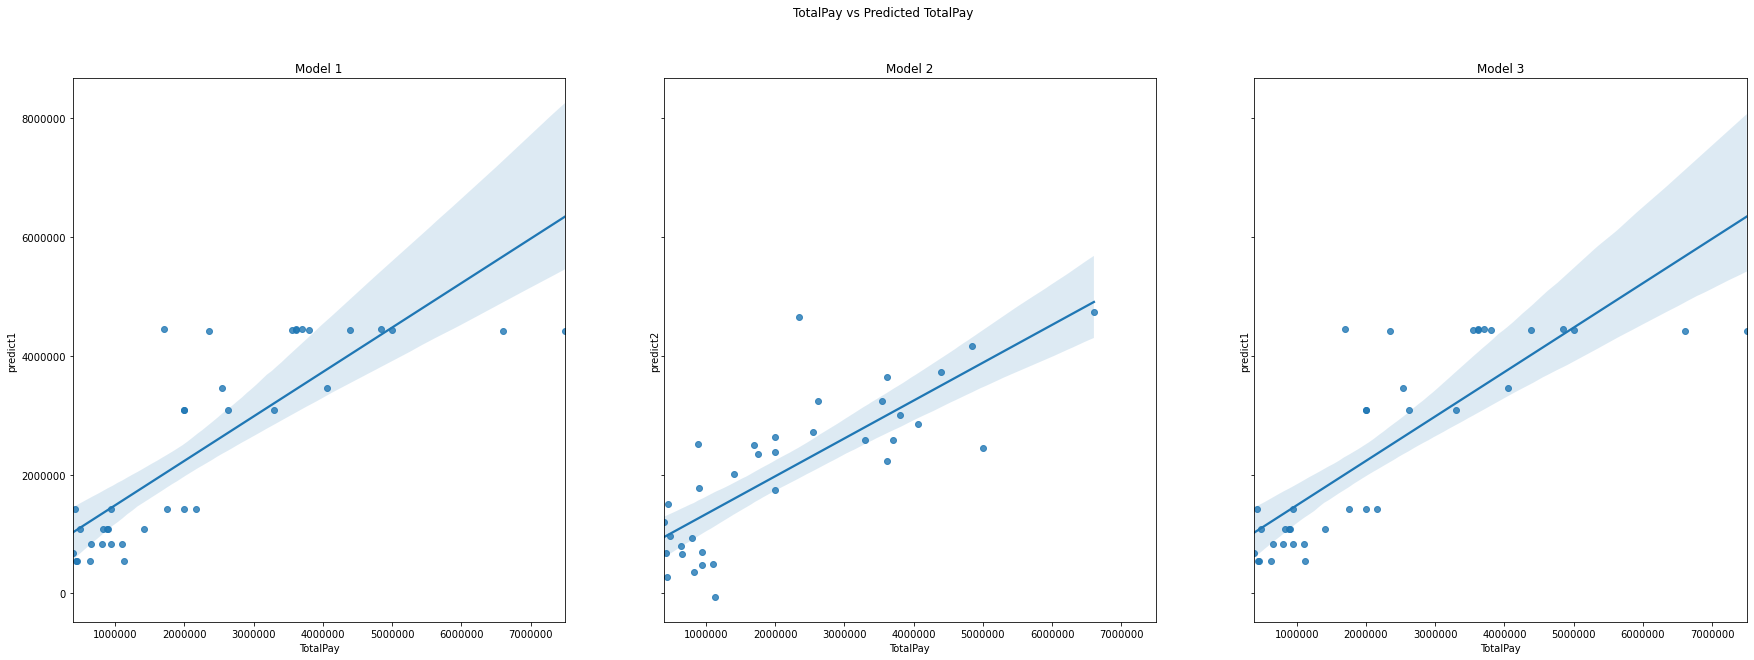

In [167]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(30,10))
fig.suptitle('TotalPay vs Predicted TotalPay')

axes[0].set_title('Model 1')
sns.regplot(ax=axes[0], data=testPredictions, x="TotalPay", y='predict1')
axes[1].set_title('Model 2')
sns.regplot(ax=axes[1], data=testPredictions, x="TotalPay", y='predict2')
axes[2].set_title('Model 3')
sns.regplot(ax=axes[2], data=testPredictions, x="TotalPay", y='predict1')
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.show()

### Predicting Syracuse Coach Salary

In [176]:
syracuseInfo=coachSchoolAcad.loc[coachSchoolAcad['School']=='Syracuse']

train_model_fit3.predict(syracuseInfo)

102   3276977.99
dtype: float64

In [179]:
#predicting Syracuse salary if in Big Ten
syrBigEast=syracuseInfo.copy()
syrBigEast['Conference_x_ACC']=0
syrBigEast['Conference_x_Big_Ten']=1
train_model_fit3.predict(syrBigEast)

102   3252678.79
dtype: float64

#### Model 4 with Z score

In [191]:
from scipy.stats import zscore
df_z = coachSchoolAcad.copy()
cols = ['SRS' , "OppPointsPerGame"   , "Losses"   , "Rank", "PointsPerGame", "turitionRevenueperStud" , "GSR" ,
              "percentWhite" , "percentBlack" , "facultySalary" , "TotalYards" , "OppYards" , "DefSRS" , "Wins"]
for col in cols:
    col_zscore = col
    df_z[col_zscore] = (df_z[col] - df_z[col].mean())/df_z[col].std(ddof=0)
df_z

,School,Coach,TotalPay,Buyout,Rank,Poll Rank,Wins,Losses,OffenSRS,DefSRS,...,midSATwriting,undergrads,percentWhite,percentBlack,costOfAttend,turitionRevenueperStud,facultySalary,GradRate,runiform,GSR
0,AirForce,Troy Calhoun,885000.00,NaN,-1.08,22,1.34,-1.59,3.58,1.04,...,NaN,NaN,-1.64,3.10,NaN,0.66,0.00,NaN,0.19,0.78
1,Akron,Terry Bowden,412500.00,688500.00,1.68,NaN,-2.17,2.40,-20.57,-0.97,...,NaN,NaN,0.00,0.00,NaN,2.04,1.91,NaN,0.62,-0.25
2,Alabama,Nick Saban,8307000.00,33600000.00,-1.66,8,1.34,-1.59,13.02,1.23,...,NaN,NaN,-1.31,-0.85,12189.00,-0.99,-1.37,NaN,0.44,0.90
3,AlabamaatBirmingham,Bill Clark,900000.00,3847500.00,0.78,NaN,0.70,-0.39,-5.89,0.17,...,NaN,NaN,-1.29,2.29,NaN,0.03,0.00,NaN,0.79,-0.82
4,AppalachianState,Scott Satterfield,712500.00,2160417.00,-1.13,19,1.98,-1.99,6.97,0.67,...,NaN,NaN,-1.55,-0.63,NaN,0.85,0.00,NaN,0.78,-0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,WestVirginia,Dana Holgorsen,3617500.00,7150000.00,0.49,NaN,-0.57,0.41,-3.55,0.07,...,NaN,NaN,1.45,-0.85,NaN,0.28,0.00,NaN,0.29,-1.28
125,WesternKentucky,Mike Sanford Jr.,805850.00,1200000.00,-0.04,NaN,0.70,-0.79,-2.90,0.47,...,NaN,NaN,1.54,-0.81,17952.00,-0.77,1.30,NaN,0.15,-1.85
126,WesternMichigan,Tim Lester,800000.00,800000.00,0.30,NaN,0.06,0.01,0.16,-0.33,...,NaN,NaN,0.68,-0.53,38830.00,-0.02,0.70,0.62,0.34,-0.82
127,Wisconsin,Paul Chryst,3750000.00,6000000.00,-1.61,11,1.02,-0.79,5.48,1.88,...,NaN,NaN,-1.62,-0.80,NaN,-1.22,0.00,NaN,0.66,1.24


In [192]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
df_z['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(df_z))
df_z_train = df_z[df_z['runiform'] >= 0.33]
df_z_test = df_z[df_z['runiform'] < 0.33]
# check training data frame
# check test data frame

# specify a simple model with bobblehead entered last
model2 = str("""TotalPay ~ SRS + OppPointsPerGame   + Losses   + Rank+ PointsPerGame+ turitionRevenueperStud + GSR +
              percentWhite + percentBlack + facultySalary + TotalYards + OppYards + DefSRS + Wins""")

# fit the model to the training set
train_model_fit2 = smf.ols(model2, data = df_z_test).fit()
# summary of model fit to the training set
print(train_model_fit2.summary())
# training set predictions from the model fit to the training set
df_z_test['predict2'] = train_model_fit2.fittedvalues

# test set predictions from the model fit to the training set
df_z_test['predict2'] = train_model_fit2.predict(df_z_test)

  

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     6.504
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           9.87e-05
Time:                        00:25:53   Log-Likelihood:                -519.53
No. Observations:                  35   AIC:                             1069.
Df Residuals:                      20   BIC:                             1092.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.55

<ipython-input-192-894433ae88b8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_z_test['predict2'] = train_model_fit2.fittedvalues
<ipython-input-192-894433ae88b8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_z_test['predict2'] = train_model_fit2.predict(df_z_test)


### Model 5

In [193]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
#coachSchoolAcad['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coachSchoolAcad))
#coachSchoolAcad_train = coachSchoolAcad[coachSchoolAcad['runiform'] >= 0.33]
#coachSchoolAcad_test = coachSchoolAcad[coachSchoolAcad['runiform'] < 0.33]
# check training data frame
# check test data frame

# specify a simple model with bobblehead entered last
model3 = str("""TotalPay ~ SRS + Rank+ PointsPerGame+ GSR + 
             Conference_x_ACC+ Conference_x_Big_12 + Conference_x_Big_Ten  + Conference_x_Pac12 + OppYards + Wins +
             Conference_x_SEC""")

# fit the model to the training set
train_model_fit3 = smf.ols(model3, data = df_z_train).fit()
# summary of model fit to the training set
print(train_model_fit3.summary())
# training set predictions from the model fit to the training set
df_z_train['predict3'] = train_model_fit3.fittedvalues

# test set predictions from the model fit to the training set
df_z_test['predict3'] = train_model_fit3.predict(df_z_test)


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     21.64
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           3.18e-18
Time:                        00:28:42   Log-Likelihood:                -1223.8
No. Observations:                  81   AIC:                             2472.
Df Residuals:                      69   BIC:                             2500.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.395e+06 

<ipython-input-193-7e1f86e703c2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_z_train['predict3'] = train_model_fit3.fittedvalues
<ipython-input-193-7e1f86e703c2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_z_test['predict3'] = train_model_fit3.predict(df_z_test)
